# Data Preparation (DataKnight)

Justin Witter
Aug-Sep 2023

## Goal
Prepare data from chess.com API to be used in statistical analysis.

## Table of Contents
1. Missing Data
1. Numeric Features
1. Categorical Features
1. Feature Engineering


In [17]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('/kaggle/input/chesscom-raw-data/raw_data.csv', index_col=0)
df.head(3)

,game_id,eco,opening,white_rating,black_rating,white_result,black_result,time_class,time_control,rated,rules,opening_pgn,pgn
0,84938425645,A21,English,1330,1384,checkmated,win,blitz,180,True,chess,1 c4 e5 2 Nc3,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat..."
1,87126548919,B01,Scandinavian,921,833,win,checkmated,blitz,300,True,chess,1 e4 d5,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat..."
2,84835519381,A00,Uncommon Opening,1003,444,win,checkmated,bullet,60,True,chess,"1 g4, a3, h3, etc.","[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat..."


## Missing Data <a id="1"></a> 

In [3]:
# check columns, dtypes, and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   game_id       10000 non-null  int64 
 1   eco           9974 non-null   object
 2   opening       9974 non-null   object
 3   white_rating  10000 non-null  int64 
 4   black_rating  10000 non-null  int64 
 5   white_result  10000 non-null  object
 6   black_result  10000 non-null  object
 7   time_class    10000 non-null  object
 8   time_control  10000 non-null  object
 9   rated         10000 non-null  bool  
 10  rules         10000 non-null  object
 11  opening_pgn   9974 non-null   object
 12  pgn           9974 non-null   object
dtypes: bool(1), int64(3), object(9)
memory usage: 1.0+ MB


In [4]:
# game_id is a unique identifier and should be categorical
df = df.astype({'game_id':object})

In [5]:
# show percent of nulls in each column
df.isnull().mean()*100

game_id         0.00
eco             0.26
opening         0.26
white_rating    0.00
black_rating    0.00
white_result    0.00
black_result    0.00
time_class      0.00
time_control    0.00
rated           0.00
rules           0.00
opening_pgn     0.26
pgn             0.26
dtype: float64

In [6]:
# drop nulls since there is less than 1% across all columns
df = df.dropna()

In [7]:
# double check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   game_id       9974 non-null   object
 1   eco           9974 non-null   object
 2   opening       9974 non-null   object
 3   white_rating  9974 non-null   int64 
 4   black_rating  9974 non-null   int64 
 5   white_result  9974 non-null   object
 6   black_result  9974 non-null   object
 7   time_class    9974 non-null   object
 8   time_control  9974 non-null   object
 9   rated         9974 non-null   bool  
 10  rules         9974 non-null   object
 11  opening_pgn   9974 non-null   object
 12  pgn           9974 non-null   object
dtypes: bool(1), int64(2), object(10)
memory usage: 1022.7+ KB


### Numeric Features <a id="2"></a> 

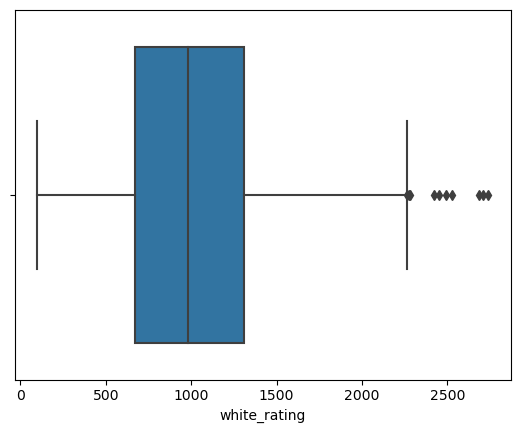

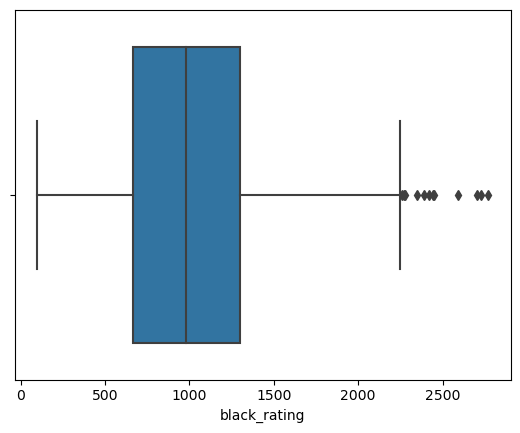

In [8]:
# check distributions for significant outliers/skew
numeric_features = df.select_dtypes(include=np.number)

for feature in numeric_features:
    sns.boxplot(x=df[feature])
    plt.show()

array([[<Axes: title={'center': 'white_rating'}>,
        <Axes: title={'center': 'black_rating'}>]], dtype=object)

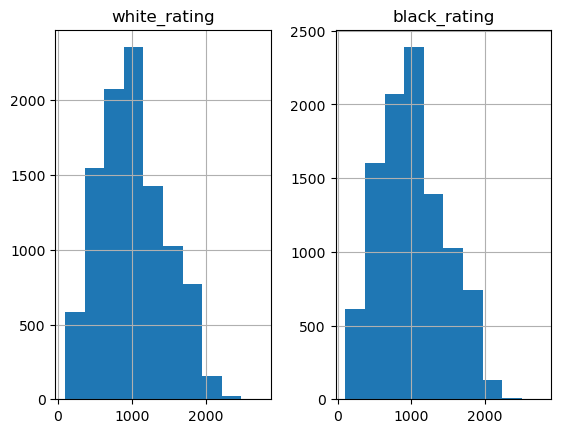

In [9]:
df.hist()

### Categorical Features <a id="3"></a> 

In [10]:
# check value counts for categorical variables
cat_features = df.select_dtypes(exclude=np.number).drop(columns=['pgn'],axis=1)
for feature in cat_features:
    val_counts = df[feature].value_counts(dropna=False)
    print(f'Column: "{feature}" | Categories: {len(val_counts)}\n-------\n{val_counts}\n-------\n\n')

Column: "game_id" | Categories: 9974
-------
84938425645    1
86662124515    1
86505539951    1
86419147657    1
87140923315    1
              ..
85302664175    1
81410249470    1
84967252645    1
86756999067    1
86897378561    1
Name: game_id, Length: 9974, dtype: int64
-------


Column: "eco" | Categories: 207
-------
A00    728
B01    710
C20    620
D00    620
A40    521
      ... 
B94      1
C49      1
C17      1
C27      1
C87      1
Name: eco, Length: 207, dtype: int64
-------


Column: "opening" | Categories: 116
-------
Queen's Pawn Game                         1486
Uncommon Opening                           728
King's Pawn Game                           715
Scandinavian                               710
French Defense                             427
                                          ... 
Sicilian, Taimanov Variation                 1
Nimzo-Indian, Classical, Noa Variation       1
French, McCutcheon                           1
Sicilian, Dragon                         

Each game id appears only once, which is good

In [11]:
# drop non-chess games (i.e. chess960, crazyhouse, etc.)
# drop non-rated games (small class / unnecessary bias)
df = df[(df['rules']=='chess') & (df['rated'])]

In [12]:
# double check
for feature in ['rules','rated']:
    val_counts = df[feature].value_counts(dropna=False)
    print(f'Column: "{feature}" | Categories: {len(val_counts)}\n-------\n{val_counts}\n-------\n\n')

Column: "rules" | Categories: 1
-------
chess    9784
Name: rules, dtype: int64
-------


Column: "rated" | Categories: 1
-------
True    9784
Name: rated, dtype: int64
-------




In [13]:
# columns no longer needed
df = df.drop(columns=['rules','rated'],axis=1)

### Feature Engineering <a id="5"></a> 

In [14]:
# create qualitative player rankings by binning
brackets = np.arange(0,3500,100)
labels = [str(bracket) for bracket in brackets[:-1]]
df['white_bracket'] = pd.cut(df['white_rating'],brackets, labels=labels)
df['black_bracket'] = pd.cut(df['black_rating'],brackets, labels=labels)

In [15]:
df = df.reset_index(drop=True)
df.head(5)

,game_id,eco,opening,white_rating,black_rating,white_result,black_result,time_class,time_control,opening_pgn,pgn,white_bracket,black_bracket
0,84938425645,A21,English,1330,1384,checkmated,win,blitz,180,1 c4 e5 2 Nc3,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1300,1300
1,87126548919,B01,Scandinavian,921,833,win,checkmated,blitz,300,1 e4 d5,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",900,800
2,84835519381,A00,Uncommon Opening,1003,444,win,checkmated,bullet,60,"1 g4, a3, h3, etc.","[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1000,400
3,81461672292,C23,Bishop's Opening,496,351,win,checkmated,blitz,180,1 e4 e5 2 Bc4,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",400,300
4,85965609191,A45,Queen's Pawn Game,1814,1761,win,resigned,rapid,600,1 d4 Nf6,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",1800,1700


In [16]:
# output data to csv
df.to_csv('clean_data.csv')